In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Setup

In [63]:
# Helpfer functions
def p(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'p%s' % n
    return percentile_

In [64]:
# Setup
RUNS_DIR = 'runs'
RUNS_FILENAME = 'run_'
RUNS_EXTENSION = 'txt'
NUM_RUNS = 100

# Profits across 100 runs

In [65]:
profits = []
for i in range(0, NUM_RUNS):
    f = "%s/%s%d.%s" % (RUNS_DIR, RUNS_FILENAME, i, RUNS_EXTENSION)
    profit = !tail -1 $f
    profits.append(float(profit[0]))

In [66]:
profits_df = pd.DataFrame(profits, columns=['profit'])
profits_df.head()

,profit
0,214.246198
1,3763.505329
2,-3264.964981
3,-115.907476
4,-6475.920192


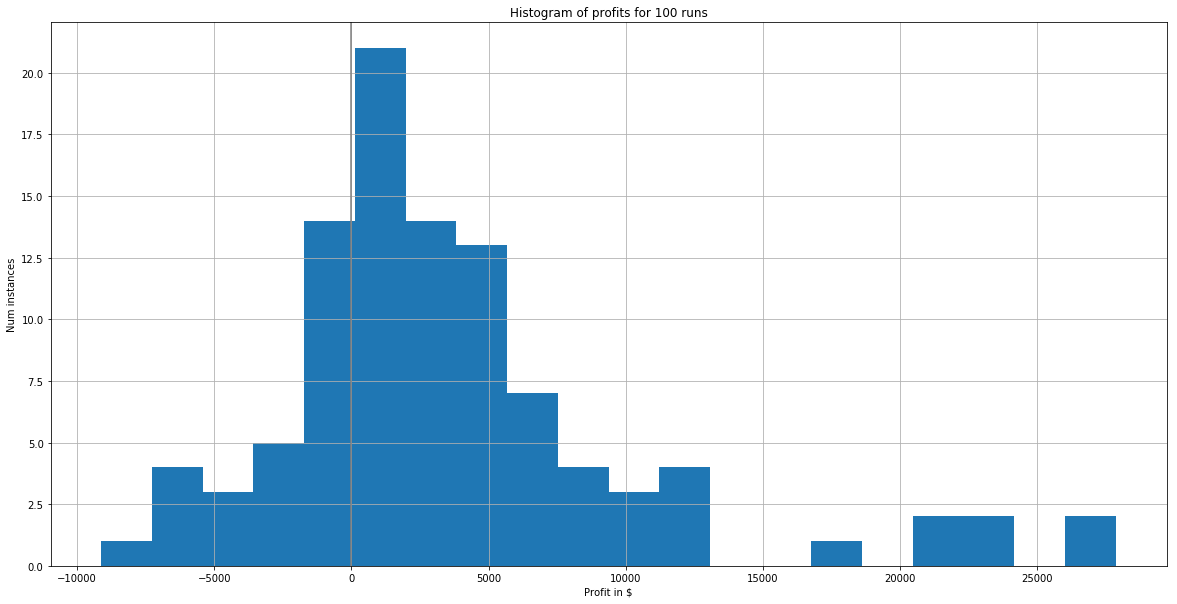

In [73]:
ax = profits_df.profit.hist(bins=20, 
                            figsize=(20,10),
                           )
ax.set_xlabel("Profit in $")
ax.set_ylabel("Num instances")
ax.set_title("Histogram of profits for 100 runs")
plt.axvline(x=0, color='grey')
plt.show()

In [59]:
profits_df.profit.describe()

count      100.000000
mean      3759.015661
std       6862.219609
min      -9116.726276
25%       -144.818402
50%       2255.199316
75%       5799.952130
max      27856.149956
Name: profit, dtype: float64

# Progression across iterations

In [31]:
runs = []
for i in range(0, 100):
    f = "%s/%s%d.%s" % (RUNS_DIR, RUNS_FILENAME, i, RUNS_EXTENSION)
    data = !cat $f | grep Profit | sed -e "s/^Profit: //"
    runs.append(list(data))

In [32]:
df = pd.DataFrame(runs)
for i in df.columns:
    df[i] = pd.to_numeric(df[i])

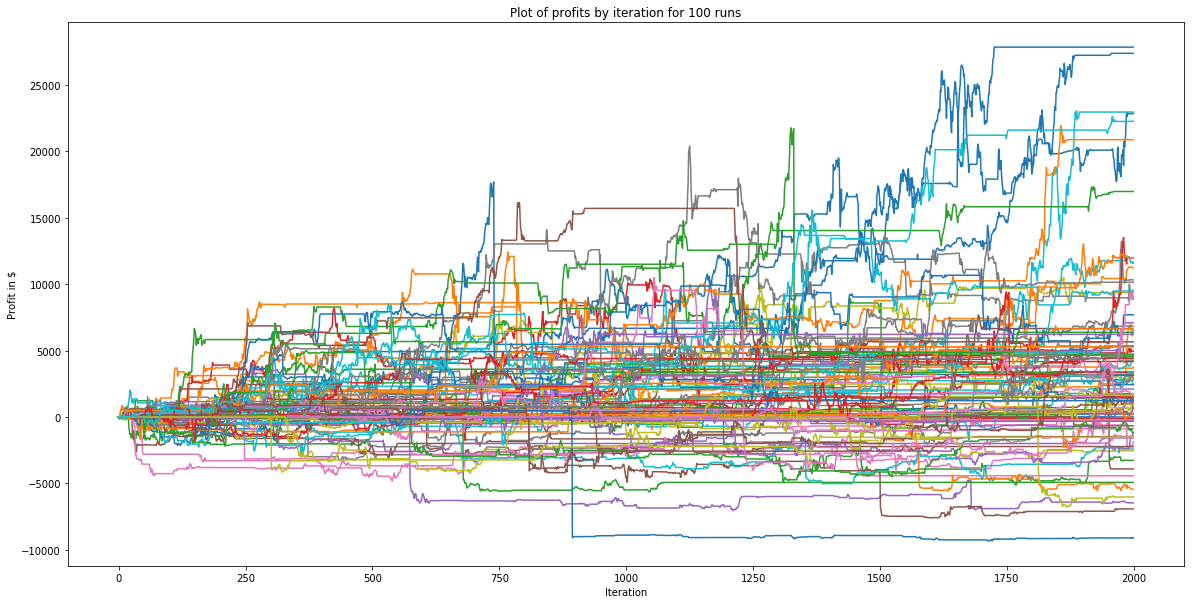

In [74]:
ax = df.transpose().plot(
    title="Plot of profits by iteration for 100 runs",
    legend=False,
    figsize=(20,10))
ax.set_xlabel("Iteration")
ax.set_ylabel("Profit in $")
plt.show()

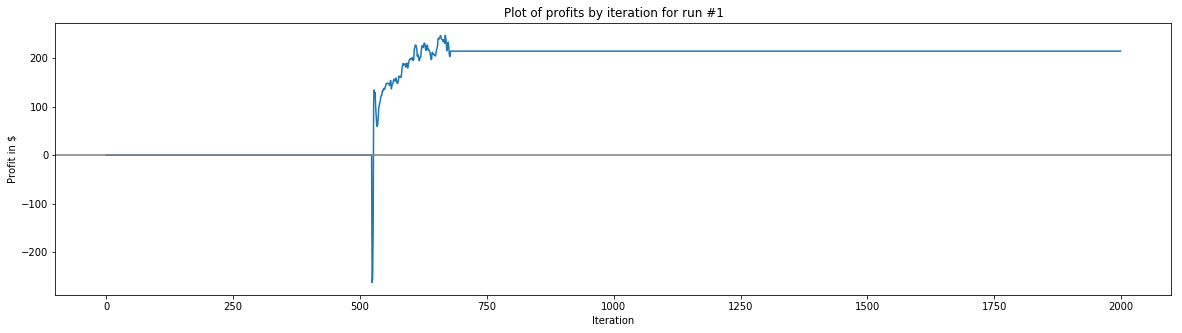

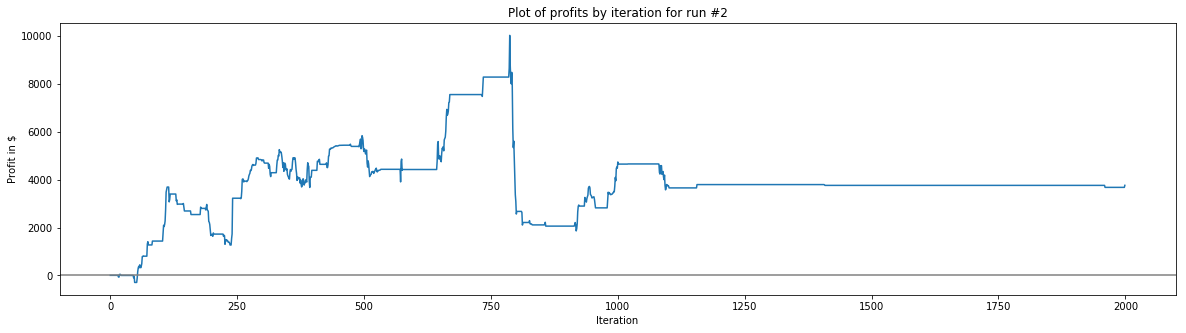

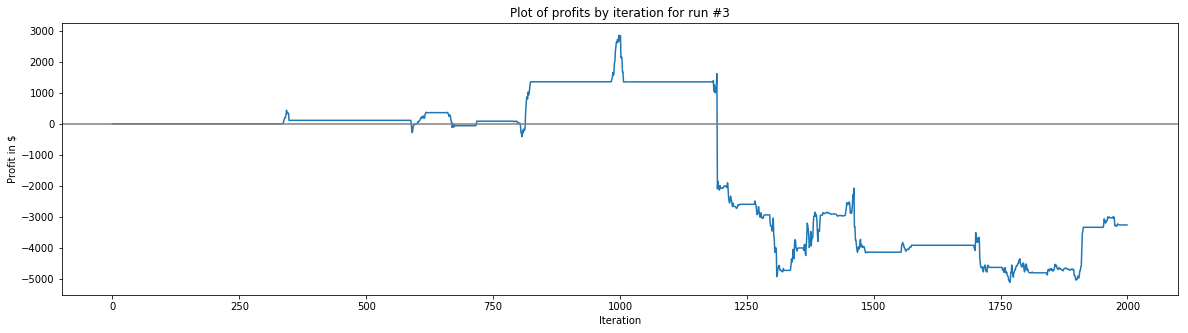

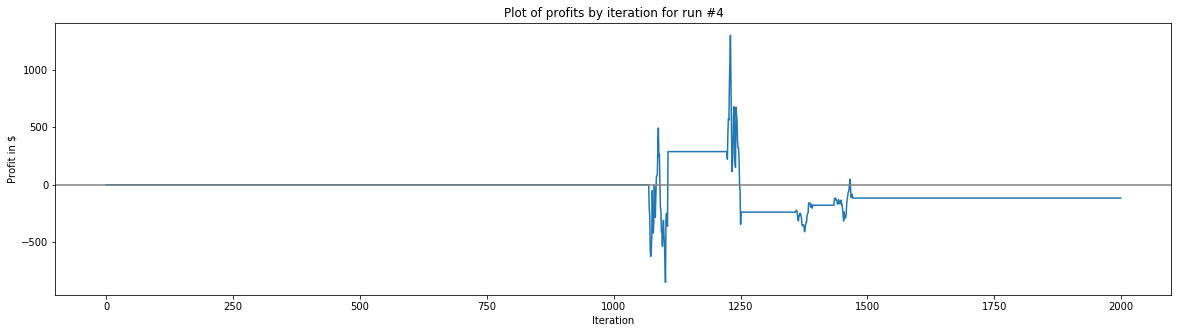

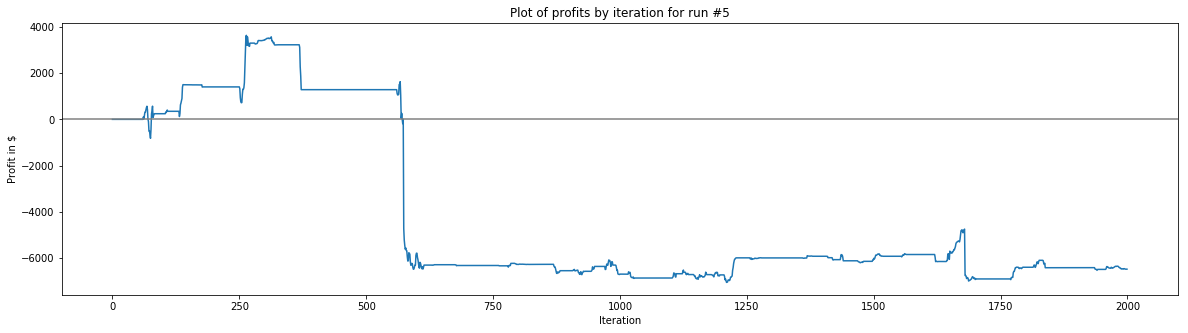

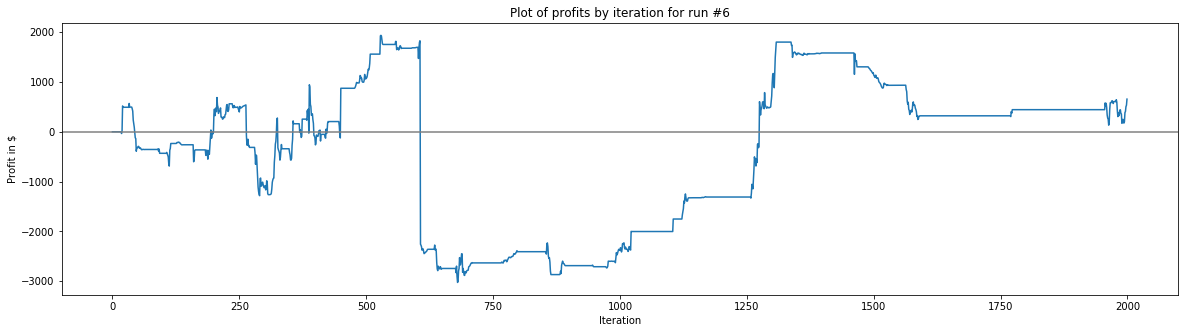

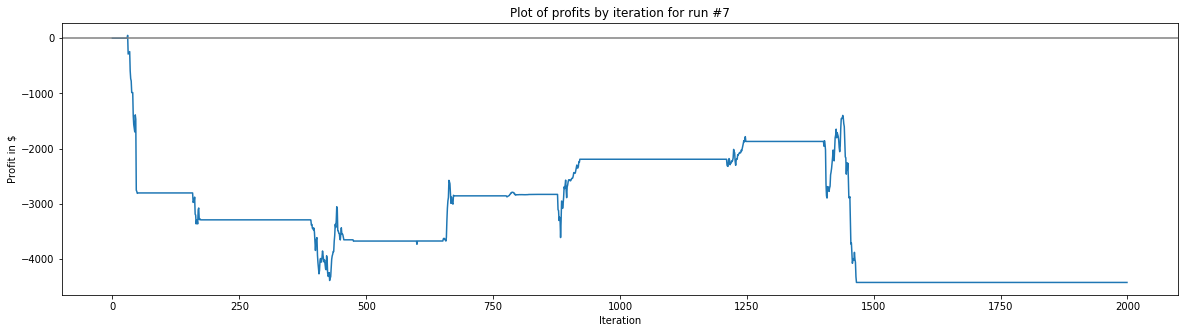

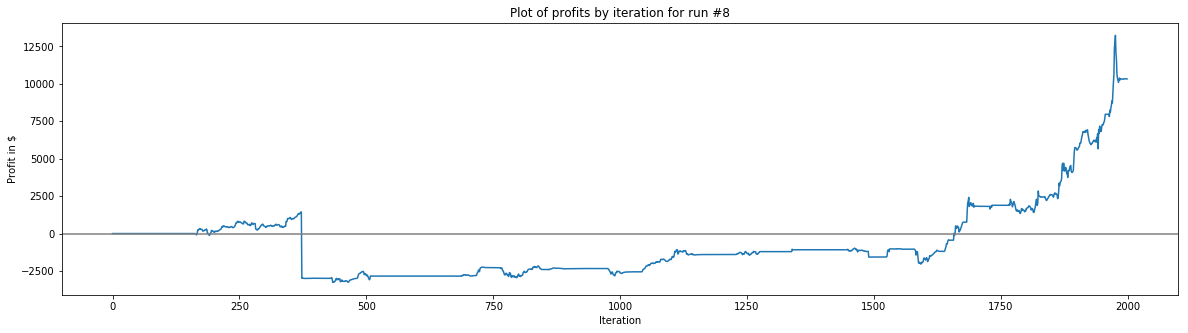

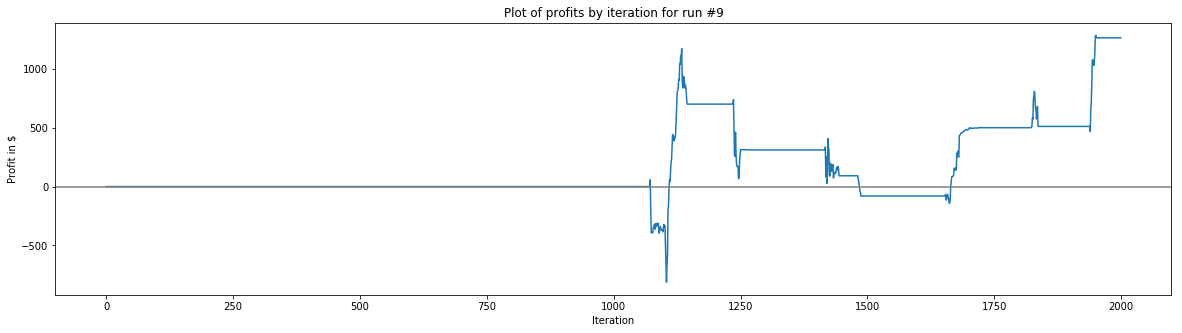

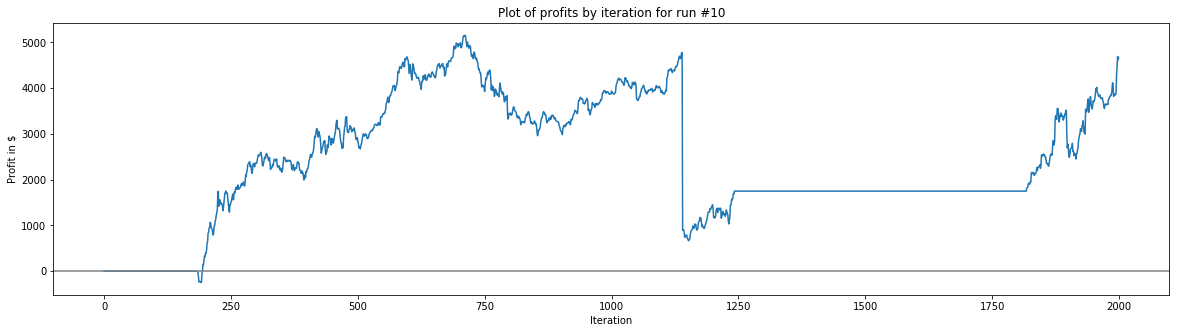

In [76]:
for i in range(10):
    ax = df.iloc[i].transpose().plot(
        title="Plot of profits by iteration for run #%d" % (i+1),
        legend=False,
        figsize=(20,5))
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Profit in $")
    plt.axhline(y=0, color='grey')
    plt.show()
    print()
    print()